# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.ensemble import RandomForestRegressor as RFR    # el modelo , el alias es cosa mia

from sklearn.model_selection import train_test_split as tts  # el alias es cosa mia

from sklearn.datasets import load_boston   # dataset

## Regression Model Evaluation

In [2]:
data=load_boston()

In [3]:
data['DESCR'].split('\n')

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [4]:
data.target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

X_train, X_test, y_train, y_test = tts(data['data'], data['target'], train_size=0.8, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

FORMULA PARA SPLITEAR EN MUESTRAS DE ENTRENO Y TEST

In [7]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [8]:
from sklearn.linear_model import LinearRegression as LinReg



In [9]:
linreg=LinReg()  # 1º INICIAR modelo nombre = modelo importado

linreg.fit(X_train, y_train) # 2º ENTRENAR los valores train >>>> modelo.fit(x_train, y_train)

y_pred_test=linreg.predict(X_test) # 3º CALCULAR Y PREDECIR  >>>'y_predecida' = modelo.predict(x_test)  ++++ X_TEST ++++

y_pred_test[:10] # 4º PRINT 

# Total de x e y : X_train,X_test,y_train,y_test,y_pred <<< IMPORTANTE OBTENER LA Y_PRED

array([[27.99617259],
       [31.37458822],
       [21.16274236],
       [32.97684211],
       [19.85350998],
       [19.20417092],
       [21.07981458],
       [19.43179838],
       [19.55995513],
       [32.46251423]])

In [10]:
linreg=LinReg()  # 1º INICIAR modelo nombre = modelo importado

linreg.fit(X_train, y_train) # 2º ENTRENAR los valores train >>>> modelo.fit(x_train, y_train)

y_pred_train=linreg.predict(X_train) # 3º CALCULAR Y PREDECIR  >>>'y_predecida' = modelo.predict(x_test) ++++ X_TRAIN ++++

y_pred_train[:10] # 4º PRINT 

# Total de x e y : X_train,X_test,y_train,y_test,y_pred <<< IMPORTANTE OBTENER LA Y_PRED

array([[23.88577067],
       [23.1522804 ],
       [21.18821954],
       [37.07763342],
       [15.69510401],
       [21.50273908],
       [32.77487204],
       [34.25179005],
       [20.37425462],
       [26.59769519]])

## 3. Calculate and print R-squared for both the training and the testing set.

r2 = coeficiente de eficacion de nuestro modelo

In [11]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred_test) # >>> y_TEST & y_pred_TEST<<< TEST + TEST



0.7657465943591124

In [12]:
from sklearn.metrics import r2_score as r2

r2(y_train, y_pred_train) # >>> y_TRAIN & y_pred_TRAIN<<< TRAIN + TRAIN

0.7295941389826617

## 4. Calculate and print mean squared error for both the training and the testing set.

r = valor medio de los errores/ margen de error

In [13]:
from sklearn.metrics import mean_squared_error as mse   

mse(y_test, y_pred_test)

20.77068478427002

In [14]:
from sklearn.metrics import mean_squared_error as mse   

mse(y_train, y_pred_train)

22.534576008227237

## 5. Calculate and print mean absolute error for both the training and the testing set.

mae = valor absoluto de los errores

In [15]:
from sklearn.metrics import mean_absolute_error as mae  # estos alias tmb son cosa mia

mae(y_test, y_pred_test)

3.425181871853359

In [16]:
from sklearn.metrics import mean_absolute_error as mae  # estos alias tmb son cosa mia

mae(y_train, y_pred_train)

3.332891470689543

RMSE = valor margen de error 

In [85]:
mse(y_test, y_pred_test, squared=False)

4.038466566146406

In [87]:
mse(y_train, y_pred_train, squared=False)

1.1427917613900558

## Classification Model Evaluation

In [17]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [18]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [19]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [20]:
from sklearn.linear_model import LogisticRegression as LogReg

In [21]:
logreg=LogReg()  # 1º INICIAR modelo nombre = modelo importado

logreg.fit(X_train, y_train) # 2º ENTRENAR los valores train >>>> modelo.fit(x_train, y_train)

y_pred_test=logreg.predict(X_test) # 3º CALCULAR Y PREDECIR  >>>'y_predecida' = modelo.predict(x_test)  ++++ X_TEST ++++

y_pred_test[:10] # 4º PRINT 

# Total de x e y : X_train,X_test,y_train,y_test,y_pred <<< IMPORTANTE OBTENER LA Y_PRED

array([0, 2, 1, 2, 1, 1, 1, 2, 1, 0])

In [22]:
logreg=LogReg()  # 1º INICIAR modelo nombre = modelo importado

logreg.fit(X_train, y_train) # 2º ENTRENAR los valores train >>>> modelo.fit(x_train, y_train)

y_pred_train=logreg.predict(X_train) # 3º CALCULAR Y PREDECIR  >>>'y_predecida' = modelo.predict(x_test)  ++++ X_TRAIN ++++

y_pred_train[:10] # 4º PRINT 

# Total de x e y : X_train,X_test,y_train,y_test,y_pred <<< IMPORTANTE OBTENER LA Y_PRED

array([0, 0, 1, 1, 1, 0, 0, 0, 2, 2])

## 8. Calculate and print the accuracy score for both the training and the testing set.

% PORCENTAJE DE PREDICCIONES CORRECTAS ENTRE 0 Y 1

In [23]:
logreg.score(X_test, y_test)  

0.9333333333333333

In [24]:
logreg.score(X_train, y_train)

0.9666666666666667

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

## 10. Calculate and print the precision score for both the training and the testing set.

es la proporcion de positivos reales acertados sobre todos los positivos predichos

In [25]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred_test, average = 'weighted')

0.9444444444444445

In [26]:
from sklearn.metrics import precision_score as prec

prec(y_train, y_pred_train, average = 'weighted')

0.9666666666666667

## 11. Calculate and print the recall score for both the training and the testing set.

In [ ]:
PROPorcion de positivos reales acertados con respectos al total de positivos que es capaz de indentificar

In [27]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred_test,average = 'weighted')

0.9333333333333333

In [28]:
from sklearn.metrics import recall_score as rec

rec(y_train, y_pred_train,average = 'weighted')

0.9666666666666667

## 12. Calculate and print the F1 score for both the training and the testing set.

F1 combina las medidas de precision y recall en un sólo valor

In [29]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred_test, average = 'weighted')

0.9337995337995337

In [30]:
f1(y_train, y_pred_train, average = 'weighted')

0.9666666666666667

## 13. Generate confusion matrices for both the training and the testing set.

In [31]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred_test)

array([[ 6,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 12]], dtype=int64)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

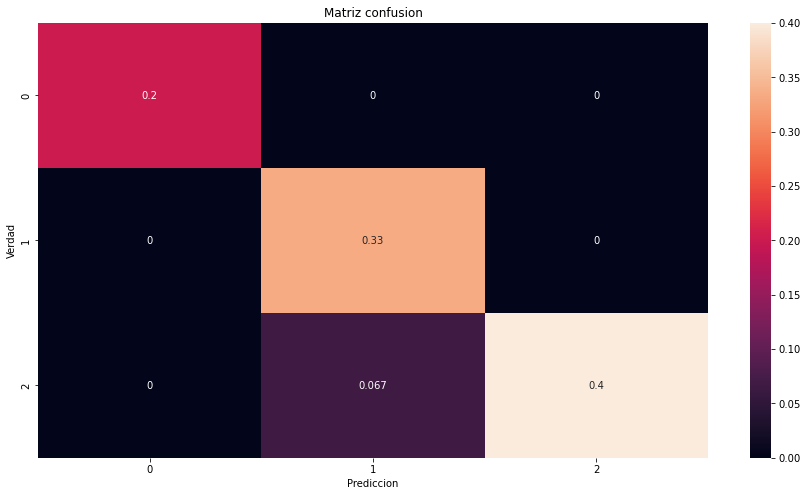

In [33]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred_test)/sum(sum(cm(y_test, y_pred_test))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [47]:
data=load_boston()

In [48]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [49]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [51]:
from sklearn.ensemble import RandomForestRegressor as RFR 

In [67]:
rf=RFR()   # inicia el modelo randomForest

rf.fit(X_train, y_train)   # entrena el modelo, lo ajusta

y_pred_test=rf.predict(X_test)  # prediccion

y_pred_test[:10]

array([27.509, 28.383, 20.526, 26.399, 20.746, 16.417, 19.545, 19.831,
       20.381, 32.754])

In [68]:
rf=RFR()   # inicia el modelo randomForest

rf.fit(X_train, y_train)   # entrena el modelo, lo ajusta

y_pred_train=rf.predict(X_train)  # prediccion

y_pred_train[:10]

array([22.106, 19.696, 21.417, 31.788, 16.858, 19.937, 33.032, 46.518,
       17.724, 20.97 ])

## sCORE 2

In [69]:
r2(y_test, y_pred_test) # >>> y_TEST & y_pred_TEST<<< TEST + TEST

0.8160634306365677

In [70]:
r2(y_train, y_pred_train) # >>> y_TEST & y_pred_TEST<<< TEST + TEST

0.9843288484292426

 ## Score.

In [71]:
rf.score(X_test, y_test) 

0.8194130093346585

In [72]:
rf.score(X_train, y_train) 

0.9843288484292426

## MSE

In [73]:
from sklearn.metrics import mean_squared_error as mse   

mse(y_test, y_pred_test)

16.30921220588234

In [75]:
mse(y_train,y_pred_train)

1.3059730099009863

## MAE

In [76]:
from sklearn.metrics import mean_absolute_error as mae  # estos alias tmb son cosa mia

mae(y_test, y_pred_test)

2.51977450980392

In [77]:
mae(y_train, y_pred_train)

0.7934059405940573